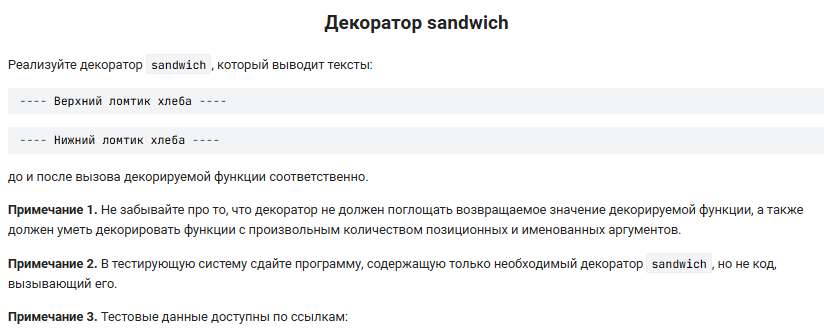

In [6]:
def sandwich(fun):
    def wrapper(*args, **kwargs):
        print('---- Верхний ломтик хлеба ----')
        res = fun(*args, **kwargs)
        print('---- Нижний ломтик хлеба ----')
        return res
    return wrapper

@sandwich
def add_ingredients(ingredients):
    print(' | '.join(ingredients))

add_ingredients(['томат', 'салат', 'сыр', 'бекон'])

---- Верхний ломтик хлеба ----
томат | салат | сыр | бекон
---- Нижний ломтик хлеба ----


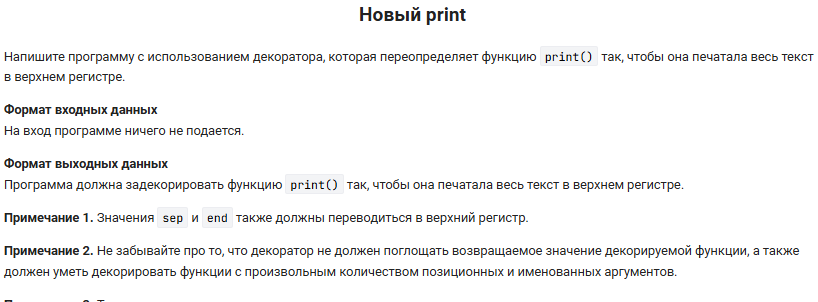

In [ ]:
def print_decorator(fun):
    def wrapper(*args,**kwargs):
        sep = ' '
        end = ''
        words = [str(i).upper() for i in args]
        if 'sep' in kwargs:
            sep = kwargs['sep'].upper()
        if 'end' in kwargs:
            end = kwargs['end'].upper()
        new_text = sep.join(words) + end
        return fun(new_text)
    return wrapper

print = print_decorator(print)

print(111, 222, 333, sep='xxx', end='python')
print(111, 222, 333, sep='--', end='\n')
print(111, 222, 333, sep='qqq', end='!')

'111--222--333\n'

In [ ]:
def uppercase_decorator(func):
    def wrapper(*args, **kwargs):
        upper_args = [str(arg).upper() if isinstance(arg, str) else arg for arg in args]

        if 'sep' in kwargs and isinstance(kwargs['sep'], str):
            kwargs['sep'] = kwargs['sep'].upper()
        if 'end' in kwargs and isinstance(kwargs['end'], str):
            kwargs['end'] = kwargs['end'].upper()

        return func(*upper_args, **kwargs)
    return wrapper

# print = uppercase_decorator(print)

# print(111, 222, 333, sep='xxx', end='python')
# print(111, 222, 333, sep='--', end='\n')
# print(111, 222, 333, sep='qqq', end='!')

'111QQQ222QQQ333!'

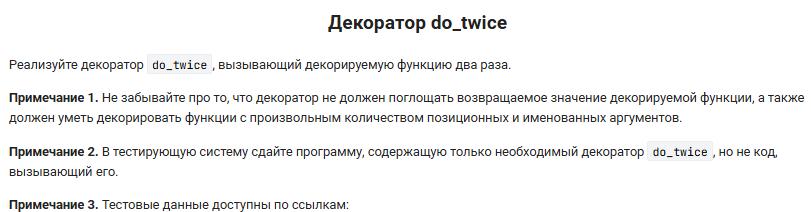

In [2]:
def do_twice(fun):
    def wrapper(*args,**kwargs):
        fun(*args,**kwargs)
        return fun(*args,**kwargs)
    return wrapper

@do_twice
def beegeek():
    print('beegeek')
    
print(beegeek())

beegeek
beegeek
None


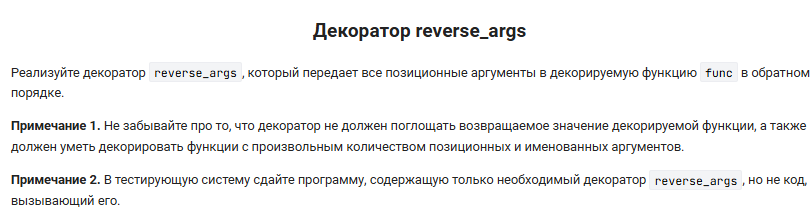

In [12]:
def reverse_args(func):
    def wrapper(*args,**kwargs):
        reversed_args = list(reversed(args))
        return func(*reversed_args,**kwargs)
    return wrapper

@reverse_args
def power(a, n):
    return a ** n
    
print(power(2, 3))

9


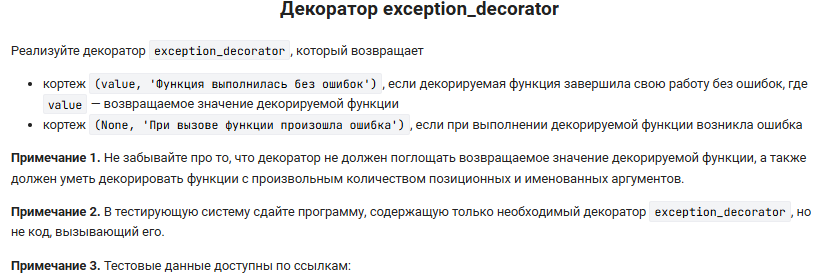

In [17]:
def exception_decorator(func):
    def wrapper(*args,**kwargs):
        res,msg = None,'При вызове функции произошла ошибка'
        try:
            res,msg = func(*args,**kwargs),'Функция выполнилась без ошибок'
        except:
            pass
        return res,msg
    return wrapper

@exception_decorator
def f(x):
    return x**2 + 2*x + 1
    
print(f(7))


(64, 'Функция выполнилась без ошибок')


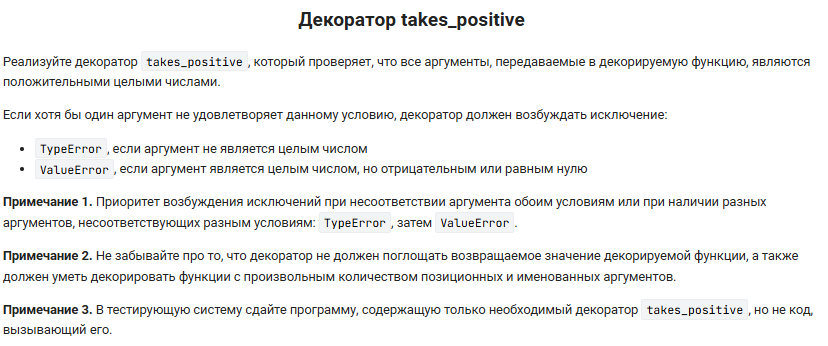

In [ ]:
def takes_positive(func):
    def wrapper(*args,**kwargs):
        for a in args:
            try:
                num = int(a)
                if num <= 0:
                    raise ValueError
                elif isinstance(a,str):
                    raise TypeError
                elif not(isinstance(a,int)):
                    raise TypeError
            except TypeError:
                raise TypeError()
            except ValueError:
                raise ValueError()
        for a in kwargs.values():
            try:
                num = int(a)
                if num <= 0:
                    raise ValueError
                elif isinstance(a,str):
                    raise TypeError
                elif not(isinstance(a,int)):
                    raise TypeError
            except TypeError:
                raise TypeError()
            except ValueError:
                raise ValueError()
        return func(*args,**kwargs)
    return wrapper

@takes_positive
def positive_sum(*args):
    return sum(args)
    
try:
    print(positive_sum(11, 20.7, 10))
except Exception as err:
    print(type(err))


<class 'ValueError'>


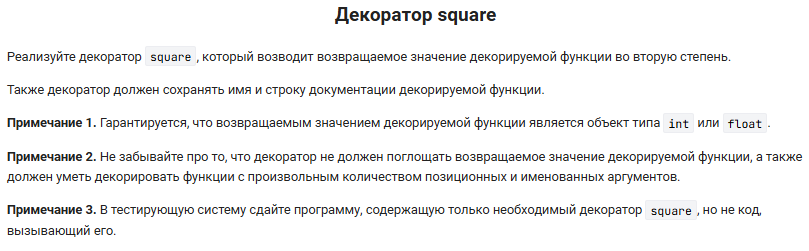

In [ ]:
import functools

def square(func):
    @functools.wraps(func)
    def wrapper(*args,**kwargs):
        value = func(*args,**kwargs)
        return value ** 2
    return wrapper



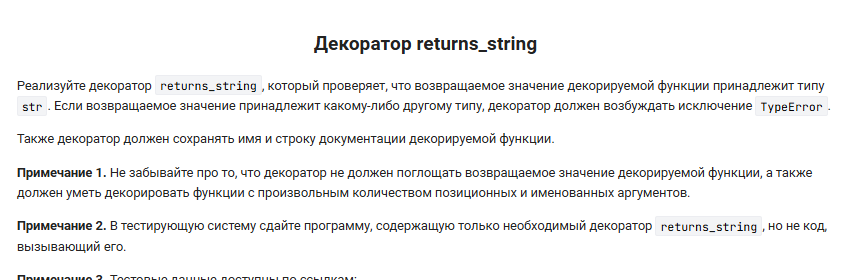

In [ ]:
import functools

def return_string(func):
    @functools.wraps(func)
    def wrapper(*args,**kwargs):
        value = func(*args,**kwargs)
        if isinstance(value,str):
            return value
        raise TypeError
    return wrapper

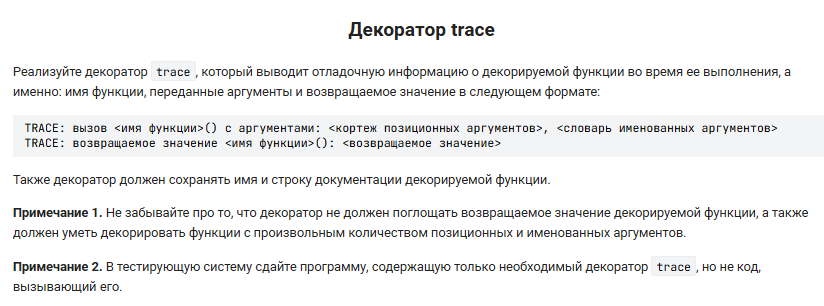

In [ ]:
import functools

def trace(func):
    @functools.wraps(func)
    def wrapper(*args,**kwargs):
        print(f'TRACE: вызов {func.__name__}() с аргументами: {tuple(args)}, {kwargs}')
        value = func(*args,**kwargs)
        print(f"TRACE: возвращаемое значение {func.__name__}(): '{value}'")
        return value
    return wrapper

@trace
def sub(a, b, c):
    '''прекрасная функция'''
    return a - b + c
    
print(sub.__name__)
print(sub.__doc__)
sub(20, 5, c=10)

sub
прекрасная функция
TRACE: вызов sub() с аргументами: (20, 5), {'c': 10}
TRACE: возвращаемое значение sub(): 25


25

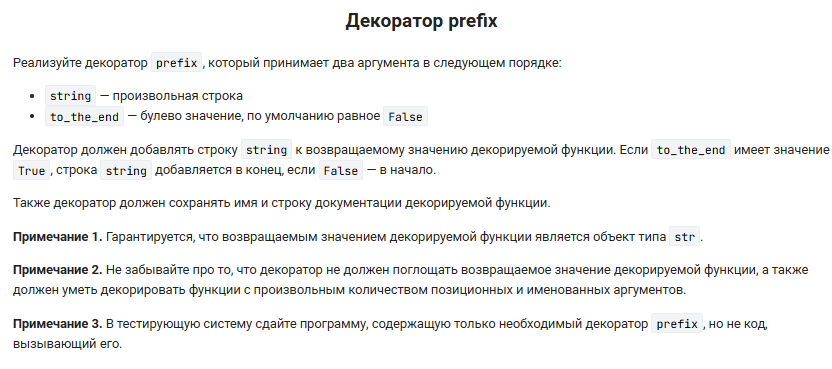

In [ ]:
import functools
def prefix(string,to_the_end=False):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            if(to_the_end):
                res = func(*args, **kwargs) + string
            else:
                res = string + func(*args, **kwargs)
            return res
        return wrapper
    return decorator
        
@prefix(' online-school', to_the_end=True)
def beegeek():
    '''beegeek docs'''
    return 'beegeek'
       

print(beegeek.__name__)
print(beegeek.__doc__)
print(beegeek())


append_this
append_this docs
[1, 2, [3, 4]]


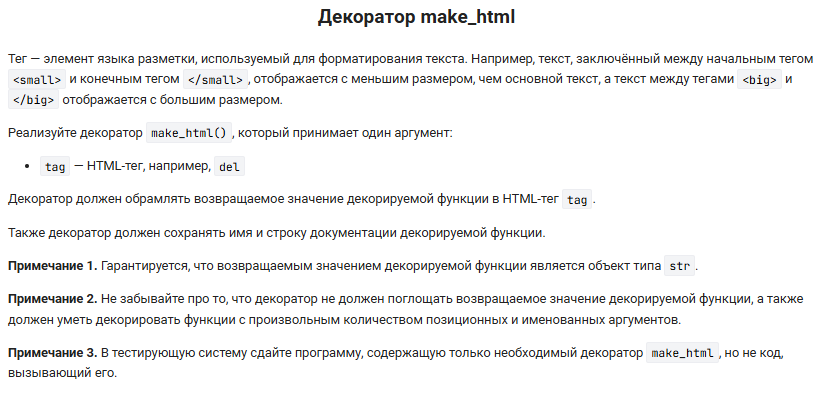

In [ ]:
def make_html(tag):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            res = f'<{tag}>{func(*args, **kwargs)}</{tag}>'
            return res
        return wrapper
    return decorator

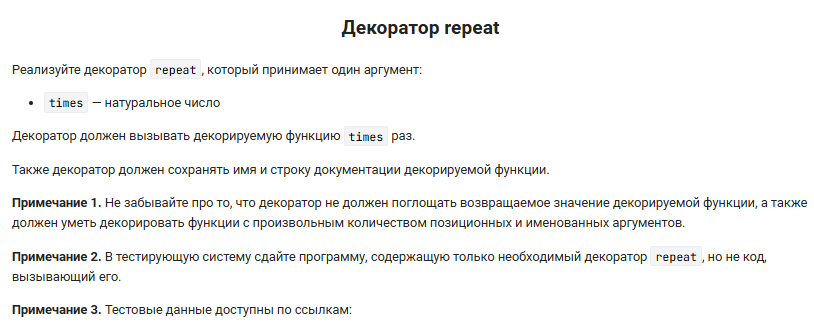

In [15]:
def repeat(times):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            res = None
            for i in range(1,times+1):
                res = func(*args, **kwargs)
            return res
        return wrapper
    return decorator

@repeat(4)
def say_beegeek():
    '''documentation'''
    print('beegeek')
    
print(say_beegeek.__name__)
print(say_beegeek.__doc__)

say_beegeek
documentation


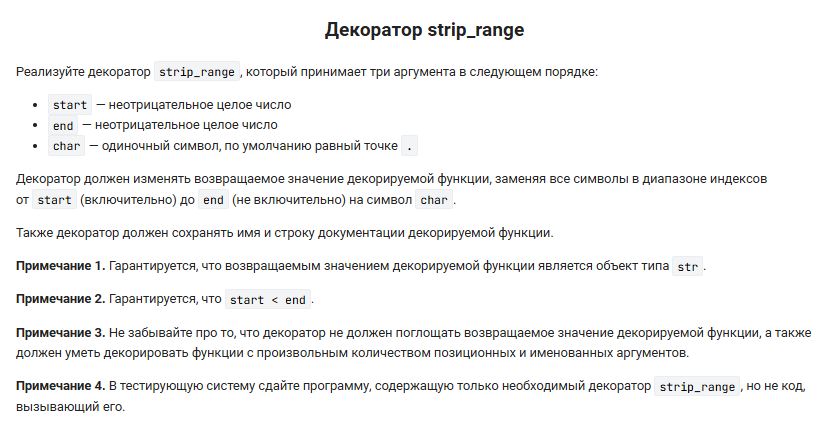

In [33]:
def strip_range(start,end,char='.'):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            n = end - start
            res = func(*args, **kwargs)
            part_one = res[0:start]
            if end + 1 < len(res):
                part_two = char * n
            else:
                part_two = char * (len(res) - start)
            part_three = res[end:len(res)]
            return part_one + part_two + part_three
        return wrapper
    return decorator

@strip_range(3, 5)
def beegeek():
    return 'beegeek'
    
print(beegeek())

bee..ek


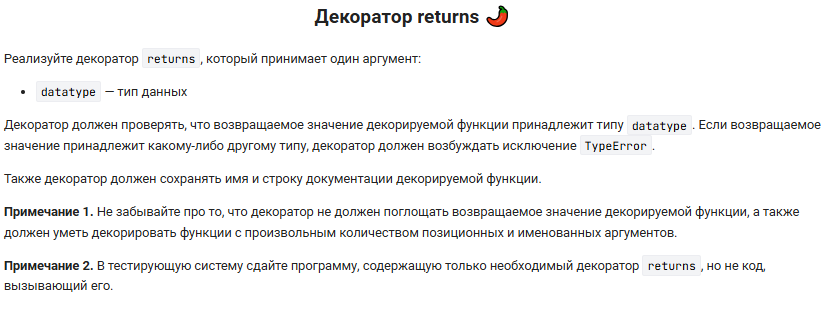

In [36]:
def returns(datatype):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            res = func(*args, **kwargs)
            if isinstance(res,datatype):
                return res
            raise TypeError
        return wrapper
    return decorator

@returns(int)
def add(a, b):
    return a + b

try:
    print(add('199', '1'))
except TypeError as e:
    print(type(e))

<class 'TypeError'>


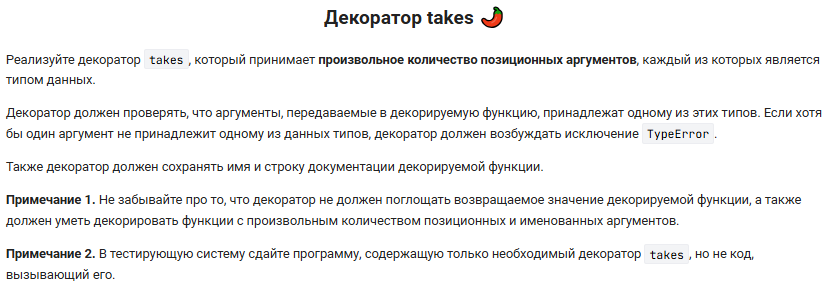

In [49]:
def takes(*takeargs):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            type_vals = list(filter(lambda x: not(isinstance(x,takeargs)),args))
            type_vals_2 = list(filter(lambda x: not(isinstance(x,takeargs)),kwargs.values()))
            if len(type_vals) > 0 or len(type_vals_2) > 0:
                raise TypeError
            res = func(*args, **kwargs)
            return res
        return wrapper
    return decorator

@takes(str)
def beegeek(word, repeat):
    return word * repeat
    
try:
    print(beegeek('beegeek', repeat=2))
except TypeError as e:
    print(type(e))

<class 'TypeError'>
